<a href="https://colab.research.google.com/github/jadhav-rakesh/ML/blob/main/ds11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Evaluation

In [1]:
import numpy as np
import pandas as pd

#Cross-Validating Models

In [2]:
#evaluate how well your classification model generalizes to unforeseen data.

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

features = digits.data
target = digits.target

standardizer = StandardScaler()

logit = LogisticRegression()

pipeline = make_pipeline(standardizer,
                         logit)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

cv_results.mean()

0.9638223460229032

In [3]:
cv_results

array([0.97222222, 0.96666667, 0.9637883 , 0.96100279, 0.95543175])

In [4]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1
)

standardizer.fit(features_train)

feautures_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [5]:
pipeline = make_pipeline(standardizer, logit)

In [6]:
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

# Creating a Baseline Regression Model

In [7]:
#You want a simple baseline regression model to use as a comparison against other models that you train.

from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

wine = load_wine()

features, target = wine.data, wine.target

f_train, f_test, t_train, t_test = train_test_split(features, target, random_state=42)

dummy = DummyRegressor(strategy="mean")
dummy.fit(f_train, t_train)
dummy.score(f_test, t_test)



-7.129820961293554e-05

In [8]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(f_train, t_train)

ols.score(f_test, t_test)

0.8870868505192568

In [9]:
clf = DummyRegressor(strategy="constant", constant=1)
clf.fit(f_train, t_train)

clf.score(f_test, t_test)

-0.00746268656716409

#Creating a Baseline Classification Model

In [10]:
#You want a simple baseline classifier to compare against your model.

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

features, target = iris.data, iris.target

f_train, f_test, t_train, t_test = train_test_split(features, target, random_state=42)

dummy = DummyClassifier(strategy="uniform", random_state=42)
dummy.fit(f_train, t_train)
dummy.score(f_test, t_test)

0.2631578947368421

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(f_train, t_train)
classifier.score(f_test, t_test)

1.0

# Evaluating Binary Classifier Predictions

In [13]:
#Given a trained classification model, you want to evaluate its quality.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=2,
                           random_state=42)

logit = LogisticRegression()

cross_val_score(logit, X, y, scoring="accuracy")

array([0.88  , 0.8705, 0.876 , 0.865 , 0.861 ])

*  in the presence of imbalanced classes, accuracy suffers from a paradox where a model is highly accurate but lacks predictive power.

- Precision
    * TP / (TP + FP)
    * measurement noise in our predictions
    * how likely we are to be right when we predict something is positive


In [14]:
cross_val_score(logit, X, y, scoring="precision")

array([0.87623762, 0.86939182, 0.88133874, 0.87397541, 0.85884692])

- Recall
    * TP / (TP + FN)
    * measures the model’s ability to identify an observation of the positive class

In [15]:
cross_val_score(logit, X, y, scoring="recall")

array([0.885, 0.872, 0.869, 0.853, 0.864])

- F1 Score
    * harmonic mean of precision and recall
    * 2 * (P * R) / (P + R)
    *  measure of correctness achieved in positive prediction
    * observations labeled as positive, how many are actually positive

In [16]:
cross_val_score(logit, X, y, scoring="f1")

array([0.88059701, 0.87069396, 0.87512588, 0.86336032, 0.86141575])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

y_hat = logit.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

0.866

#Evaluating Binary Classifier Thresholds

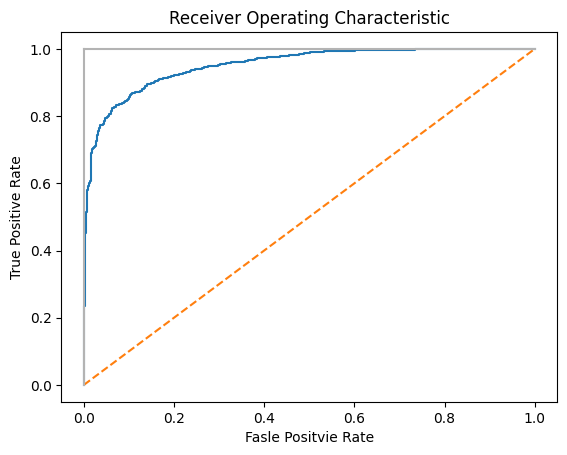

In [19]:
# evaluate a binary classifier and various probability thresholds.

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=42)

f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.2, random_state=42)

logit = LogisticRegression()

logit.fit(f_train, t_train)

target_probabilities = logit.predict_proba(f_test)[:, 1]

false_positive_rate, true_positive_rate, threshold = roc_curve(t_test, target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("Fasle Positvie Rate")
plt.show()

* ROC compares the presence of true positives and false positives at every probability threshold (i.e., the probability at which an observation is predicted to be a class)

In [20]:
logit.predict_proba(f_test)[0:1]

array([[0.09976066, 0.90023934]])

In [21]:
logit.classes_

array([0, 1])

- true positive rate (TPR)
    * TP / (TP + FN)

-  false positive rate (FPR)
    * FP / (FP + TN)

In [23]:
print(threshold[124])
print(true_positive_rate[124])
print(false_positive_rate[124])

0.600203548531032
0.8425275827482447
0.0897308075772682


In [26]:
print(threshold[19])
print(true_positive_rate[19])
print(false_positive_rate[19])

0.9002173334889315
0.5787362086258776
0.00897308075772682


In [28]:
# The closer the AUC ROC is to 1, the better the model.

roc_auc_score(t_test, target_probabilities)

0.9510275592480332

#Evaluating Multiclass Classifier Predictions


In [29]:
#You have a model that predicts three or more classes and want to evaluate the model’s performance.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features, target = make_classification(n_samples=10000,
                                        n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

logit = LogisticRegression()

cross_val_score(logit, features, target, scoring="accuracy")

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [30]:
cross_val_score(logit, features, target, scoring="f1_macro")

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

* macro - Calculate the mean of metric scores for each class, weighting each class equally.
* weighted - Calculate the mean of metric scores for each class, weighting each class proportional to its size in the data.
* micro -Calculate the mean of metric scores for each observation-class combination

#Visualizing a Classifier’s Performance

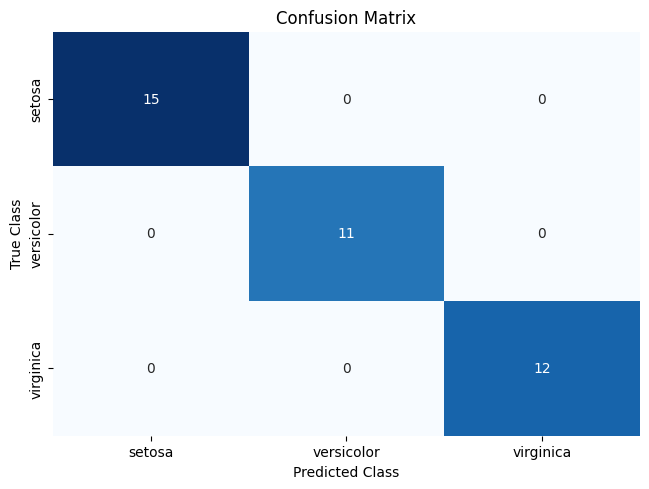

In [31]:
#Given predicted classes and true classes of the test data, you want to visually compare the model’s quality.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()

features, target = iris.data, iris.target

class_names = iris.target_names

f_train, f_test, t_train, t_test = train_test_split(features, target, random_state=42)

classifier = LogisticRegression()

target_predicted = classifier.fit(f_train, t_train).predict(f_test)

matrix = confusion_matrix(t_test, target_predicted)

df = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()



1. a perfect model will have values along the diagonal and zeros everywhere else
2. a confusion matrix lets us see not only where the model was wrong but also how it was wrong.
3. confusion matrices work with any number of classes


#Evaluating Regression Models

In [32]:
#evaluate the performance of a regression model.
#mean squared error (MSE):

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)

ols = LinearRegression()

cross_val_score(ols, features, target, scoring="neg_mean_squared_error")

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

* MSE is a measurement of the squared sum of all distances between predicted and true values
* The higher the value of MSE, the greater the total squared error and thus the worse the model


In [33]:
#R-squared

cross_val_score(ols, features, target, scoring="r2")

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

*  R^2 measures the amount of variance in the target vector that is explained by the model.
* The closer that R^2 is to 1.0, the better the model.

#Evaluating Clustering Models

In [34]:
#You have used an unsupervised learning algorithm to cluster your data. Now you want to know how well it did.

# silhouette coefficients

from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples=100,
                         n_features=10,
                         centers=2,
                         cluster_std=0.5,
                         shuffle=True,
                         random_state=42)

model = KMeans(n_clusters=2, random_state=42).fit(features)

target_predicted = model.labels_

silhouette_score(features, target_predicted)

0.8695255299401942

* “good” clusters having very small distances between observations in the same cluster (i.e., dense clusters) and large distances between the different clusters (i.e., well-separated clusters).
* Silhouette coefficients range between –1 and 1, with 1 indicating dense, well-separated clusters.

#Creating a Custom Evaluation Metric

In [35]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   random_state=42)

f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.2, random_state=42)

def custom_metric(t_test, target_predicted):
    r2 = r2_score(t_test, target_predicted)
    return r2

score = make_scorer(custom_metric, greater_is_better=True)

classifier = Ridge()

model = classifier.fit(f_train, t_train)

score(model, f_test, t_test)

0.9997747579184906

In [36]:
target_predicted = model.predict(f_test)
r2_score(t_test, target_predicted)

0.9997747579184906

#Visualizing the Effect of Training Set Size

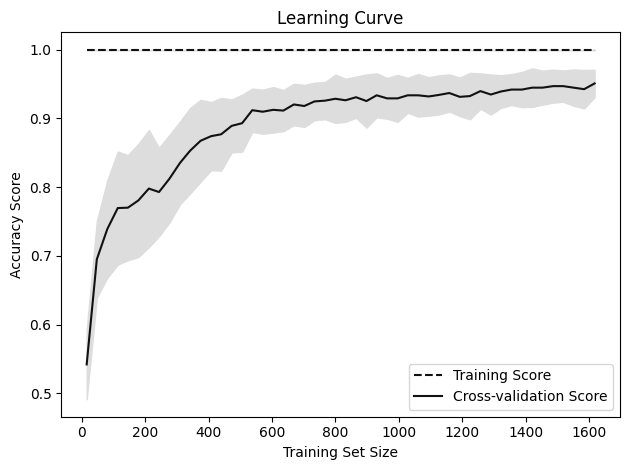

In [37]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        cv=10,
                                                        scoring="accuracy",
                                                        n_jobs=-1,
                                                        train_sizes=np.linspace(
                                                            0.01,
                                                            1.0,
                                                            50
                                                        ))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training Score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#Creating a Text Report of Evaluation Metrics

In [41]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()

features, target = iris.data, iris.target

class_names = iris.target_names

f_train, f_test, t_train, t_test = train_test_split(features, target, random_state=42)

classifier = LogisticRegression()

model = classifier.fit(f_train, t_train)

target_predicted = model.predict(f_test)

print(classification_report(t_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



#Visualizing the Effect of Hyperparameter Values

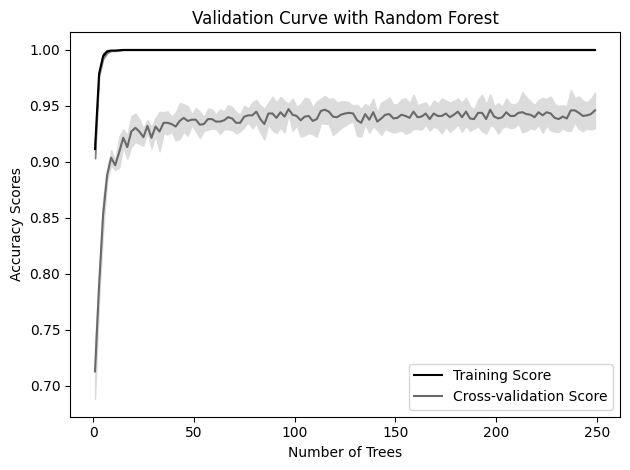

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()

features, target = digits.data, digits.target

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             features,
                                             target,
                                             param_name="n_estimators",
                                             param_range=param_range,
                                             cv=3,
                                             scoring="accuracy",
                                             n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training Score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation Score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Scores")
plt.tight_layout()
plt.legend(loc="best")
plt.show()
